# GW190426_152155

#### Import needed python modules

In [11]:
import numpy as np
from scipy import signal
import scipy.signal as sig
from scipy.interpolate import interp1d
from scipy.fftpack import fft, fftfreq,rfft, rfftfreq, irfft
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

## DATA

In [12]:
#open the file
signal19= np.loadtxt('GW190426_152155_2022.csv')

fs= 2* 65536

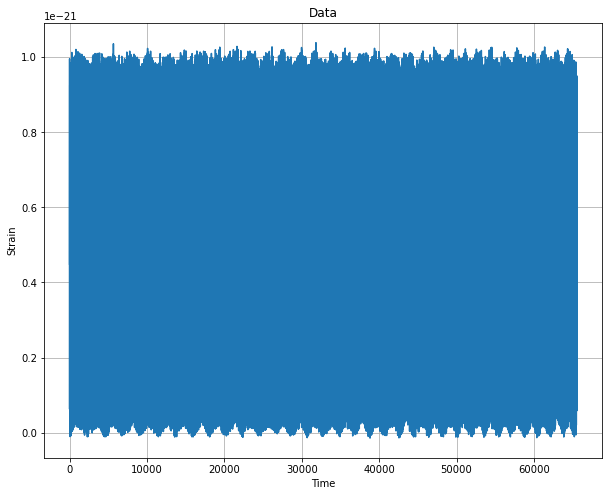

In [13]:
#plot the signal with  noise

plt.figure(figsize=(10,8))
plt.plot(signal19)
plt.grid('on')
plt.title('Data')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.savefig('data1')

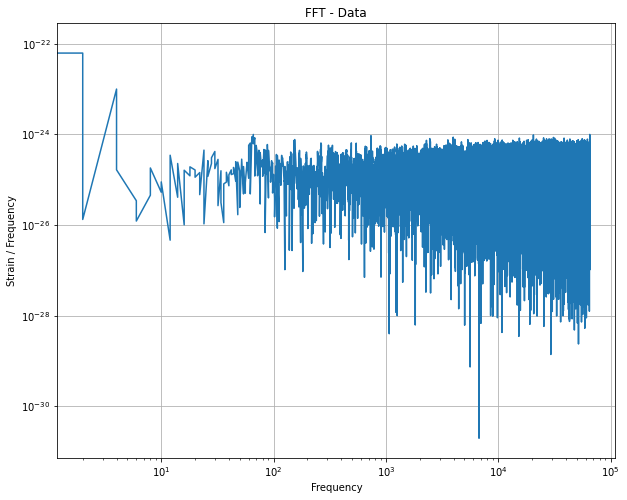

In [14]:
#Windowing the data
window19= np.blackman(signal19.size)
windowed_data19= signal19*window19 

#FFT of the data
fft_data19= rfft(windowed_data19, n=None)/fs    
fftfreq_data19= rfftfreq(len(window19))*fs

plt.figure(figsize=(10,8))
plt.loglog(fftfreq_data19, abs(fft_data19))                                   
plt.grid('on')
plt.title('FFT - Data')
plt.xlabel('Frequency')
plt.ylabel('Strain / Frequency')
plt.savefig('fftdata')

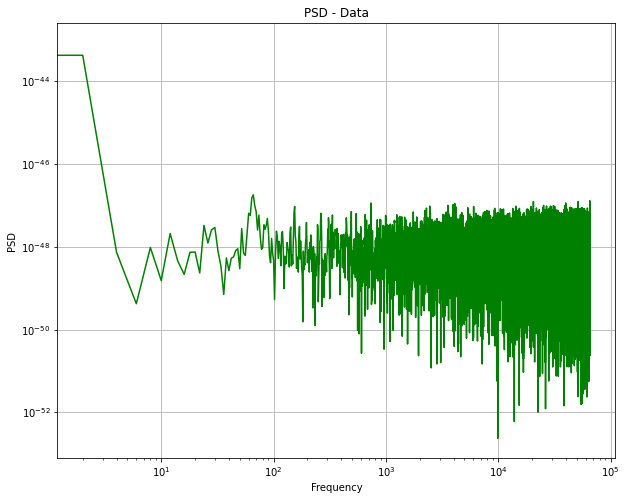

In [15]:
#psd of the data
psd_data19, freq_psd_data19 = mlab.psd(signal19, NFFT=65536, Fs=fs)

plt.figure(figsize=(10,8))
plt.loglog(freq_psd_data19, psd_data19, 'g')
plt.title('PSD - Data')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.grid('on')
plt.savefig('psddata')

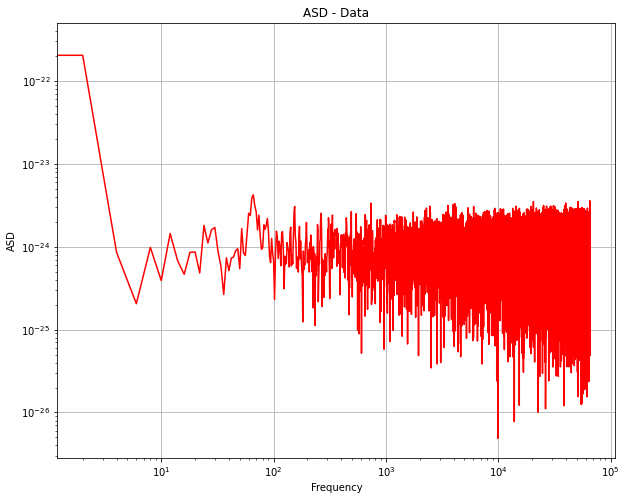

In [16]:
#ASD of teh data
asd_data19= np.sqrt(psd_data19)

plt.figure(figsize=(10,8))
plt.loglog(freq_psd_data19, asd_data19, 'r')
plt.title('ASD - Data')
plt.xlabel('Frequency')
plt.ylabel('ASD')
plt.grid('on')
plt.savefig('asddata')

C:\Users\TATIAN~1\AppData\Local\Temp/ipykernel_21320/560568075.py:2: UserWarning: Only one segment is calculated since parameter NFFT (=65536) >= signal length (=65536).
  espec_power_data19, espec_freqs_data19, bins, im = plt.specgram(signal19, NFFT=65536, Fs=fs, window= windowed_data19, cmap= 'inferno')


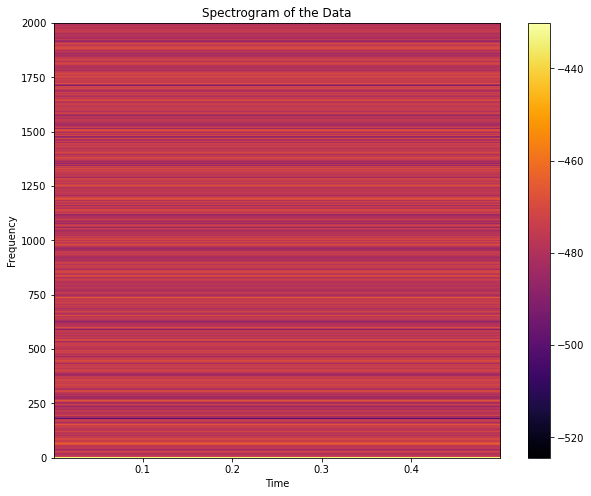

In [17]:
plt.figure(figsize=(10,8))
espec_power_data19, espec_freqs_data19, bins, im = plt.specgram(signal19, NFFT=65536, Fs=fs, window= windowed_data19, cmap= 'inferno')
plt.title('Spectrogram of the Data')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(0, 2000)
plt.colorbar()
plt.savefig('specdata')

## Template

C:\Users\TATIAN~1\AppData\Local\Temp/ipykernel_21320/2872345340.py:67: UserWarning: Only one segment is calculated since parameter NFFT (=65536) >= signal length (=65536).
  espec_power_template, espec_freqs_template, bins, im = plt.specgram(template_strain, NFFT=65536, Fs=fs, window= window_template, cmap= 'inferno')


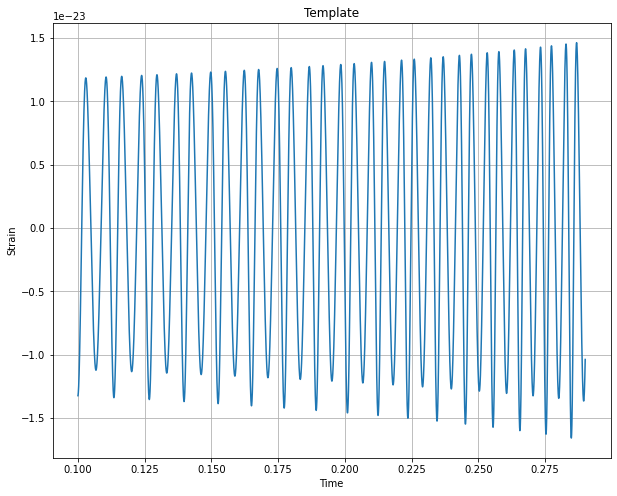

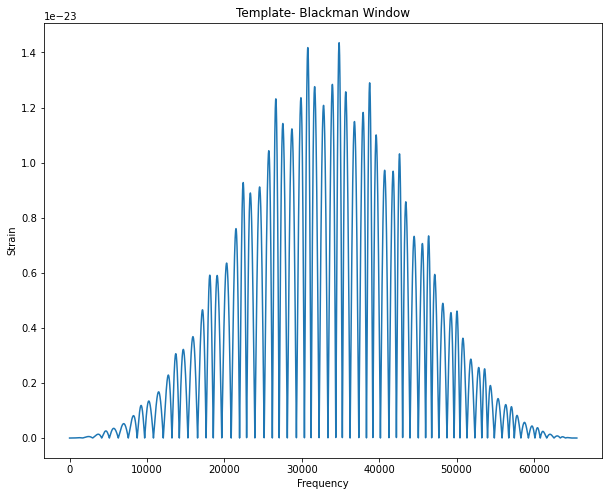

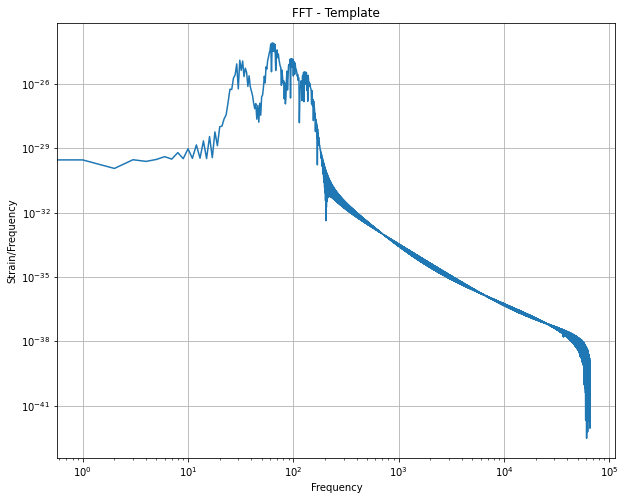

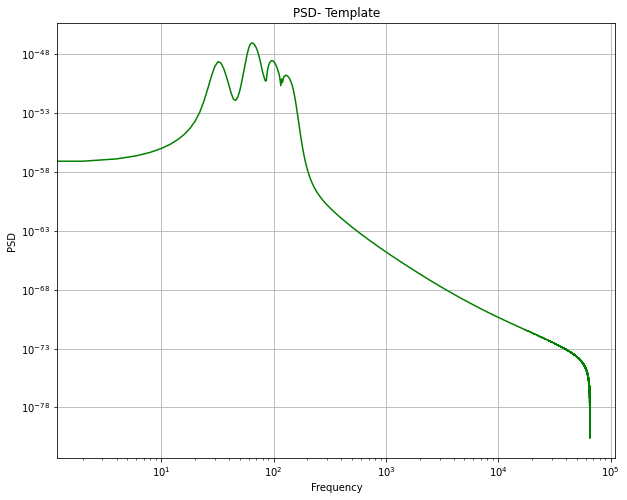

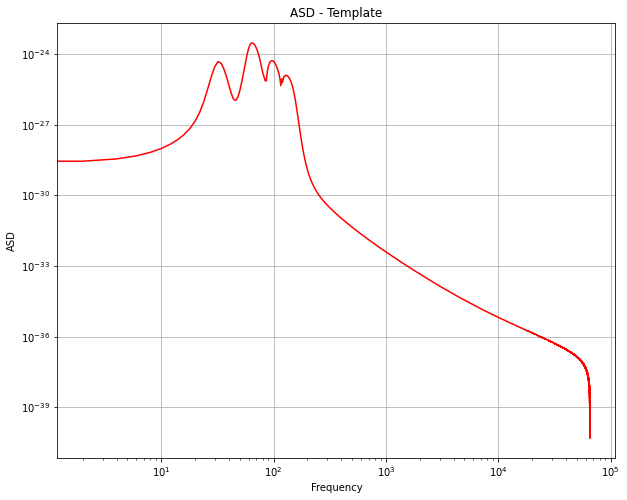

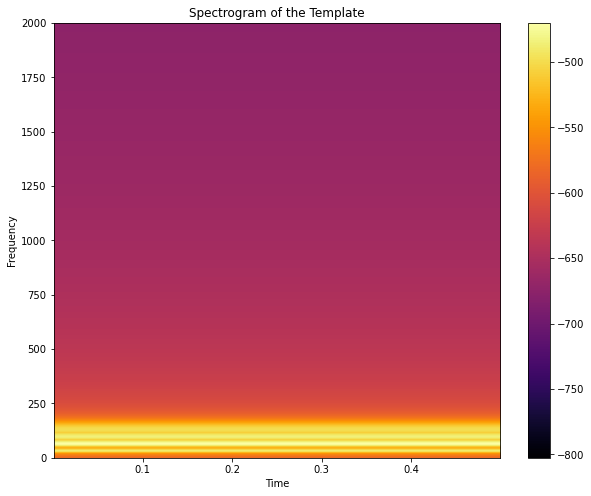

In [18]:
#Open the file

template= np.loadtxt('GW190426_152155_template_2022.csv')

#Setting some parameters
template_time= template[:,0]
template_strain= template[:,1]


plt.figure(figsize=(10,8))
plt.plot(template_time, template_strain)
plt.grid('on')
plt.title('Template')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.savefig('temp1')

#windowing the template
window_template=np.blackman(template_strain.size)
windowed_template = template_strain*window_template

#Template with blackman window
plt.figure(figsize=(10,8))
plt.plot(abs(windowed_template))
plt.title('Template- Blackman Window')
plt.xlabel('Frequency')
plt.ylabel('Strain')


#performing the FFT of the template
fs_template= 2* 65536
fft_template= rfft(windowed_template)/ fs
fft_freq_template = rfftfreq(len(window_template))* fs

plt.figure(figsize=(10,8))
plt.loglog(abs(fft_template))
plt.grid('on')
plt.title('FFT - Template')
plt.xlabel('Frequency')
plt.ylabel('Strain/Frequency')
plt.savefig('temp2')

#PSD of the template
psd_template, freq_psd_template = mlab.psd(template_strain, NFFT=65536, Fs=fs)

plt.figure(figsize=(10,8))
plt.loglog(freq_psd_template, psd_template, 'g')
plt.title('PSD- Template')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.grid('on')
plt.savefig('temp3')

#ASD of the template
asd_template= np.sqrt(psd_template)

plt.figure(figsize=(10,8))
plt.loglog(freq_psd_template, asd_template, 'r')
plt.title('ASD - Template')
plt.xlabel('Frequency')
plt.ylabel('ASD')
plt.grid('on')
plt.savefig('temp4')

#Spectrogram of the template
plt.figure(figsize=(10,8))
espec_power_template, espec_freqs_template, bins, im = plt.specgram(template_strain, NFFT=65536, Fs=fs, window= window_template, cmap= 'inferno')
plt.title('Spectrogram of the Template')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(0, 2000)
plt.colorbar()
plt.savefig('temp5')


## Signal Analysis

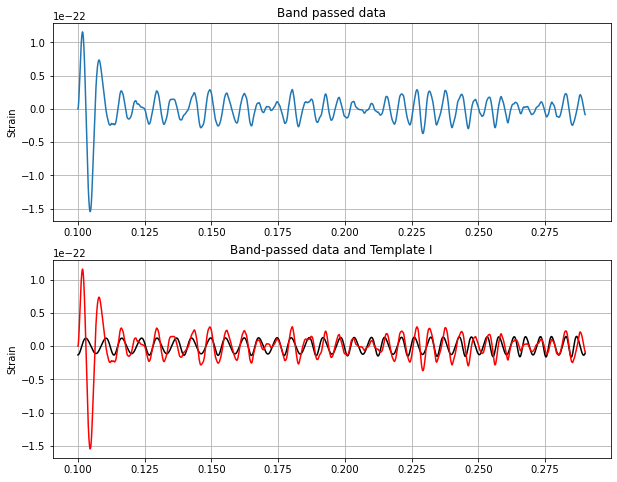

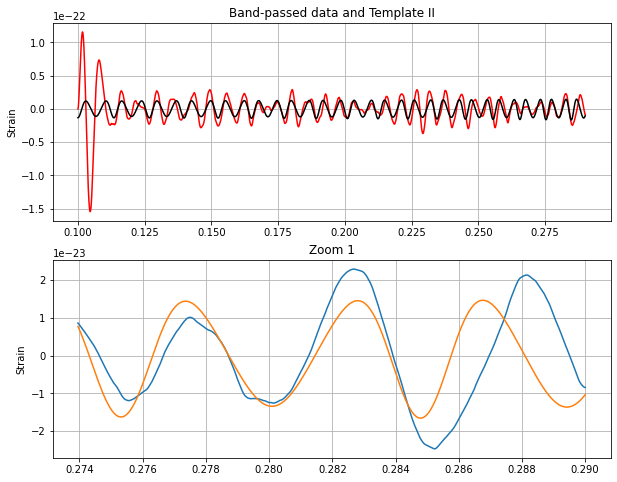

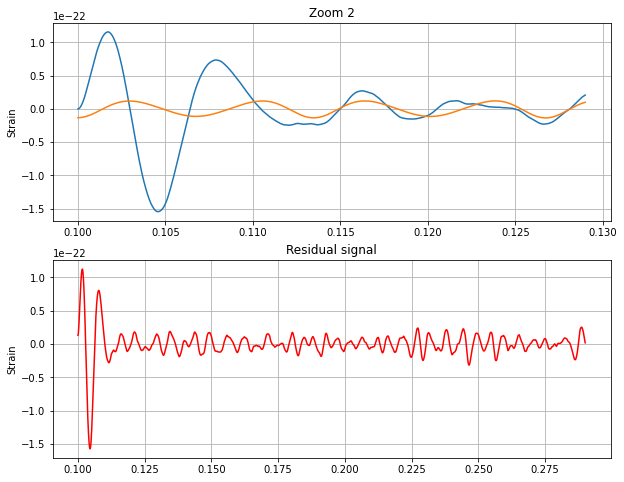

In [19]:
#Bandpass Filter
(B,A) = sig.butter(2, [42/(fs_template/2.0),90/(fs_template/2.0)], btype='pass')     
data_pass= sig.lfilter(B, A, signal19) 


#Plot of the band-passed signal
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(template_time, data_pass)
plt.title('Band passed data')
plt.ylabel('Strain')
plt.grid('on')


#Plot the comparison of the filtered signal with the template (template in the background)
plt.subplot(2,1,2)
plt.plot(template_time,template_strain,'k')
plt.plot(template_time,data_pass,'r')
plt.title('Band-passed data and Template I')
plt.ylabel('Strain')
plt.grid('on')

#Plot the comparison of the filtered signal with the template (template on the front)
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(template_time,data_pass,'r')
plt.plot(template_time,template_strain,'k')
plt.title('Band-passed data and Template II')
plt.ylabel('Strain')
plt.grid('on')

#Zoom of the end
plt.subplot(2,1,2)
plt.subplot(2,1,2)
plt.plot(template[60000:,0],data_pass[60000:])
plt.plot(template[60000:,0],template[60000:,1])
plt.title('Zoom 1')
plt.ylabel('Strain')
plt.grid('on')

#Zoom of the beginning
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(template[:10000,0],data_pass[:10000])
plt.plot(template[:10000,0],template[:10000,1])
plt.title('Zoom 2')
plt.ylabel('Strain')
plt.grid('on')

#Residual signal - Extracted noise
plt.subplot(2,1,2)
plt.plot(template_time,data_pass-template_strain,'r')
plt.title('Residual signal')
plt.ylabel('Strain')
plt.grid('on')

C:\Users\TATIAN~1\AppData\Local\Temp/ipykernel_21320/581213289.py:3: UserWarning: Only one segment is calculated since parameter NFFT (=65536) >= signal length (=65536).
  espec_power_data17, espec_freqs_data17, bins, im = plt.specgram(data_pass, NFFT=65536, Fs=fs, window= windowed_data19, cmap= 'inferno')


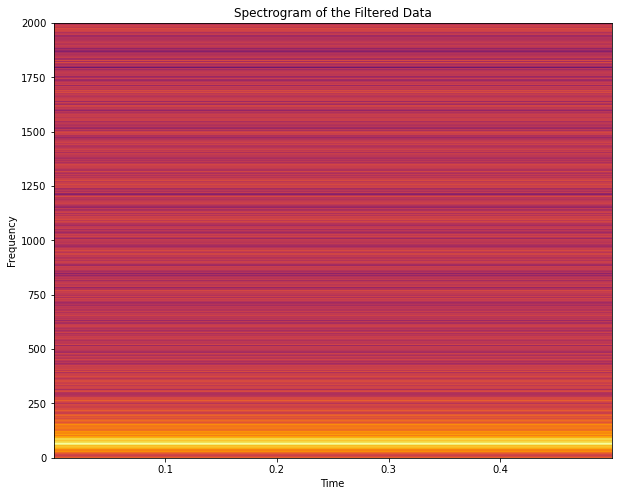

In [20]:
#Spectrogram of the filtered signal
plt.figure(figsize=(10,8))
espec_power_data17, espec_freqs_data17, bins, im = plt.specgram(data_pass, NFFT=65536, Fs=fs, window= windowed_data19, cmap= 'inferno')
plt.title('Spectrogram of the Filtered Data')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(0, 2000)
plt.savefig('specnew')